## Create list of all files

In [5]:
# find all of the files in the directory
import os

flist=[]
for root, dirs, files in os.walk("/home/agata/data/xeno-canto-dataset/"):
    for file in files:
        if file.endswith(".mp3"):
            flist.append(os.path.join(root, file))
                
print('Found ', len(flist),' files.')

Found  1308  files.


##  Load example file

Selected random files number: [815, 687, 222, 647, 896, 100, 1155, 550, 621, 595]


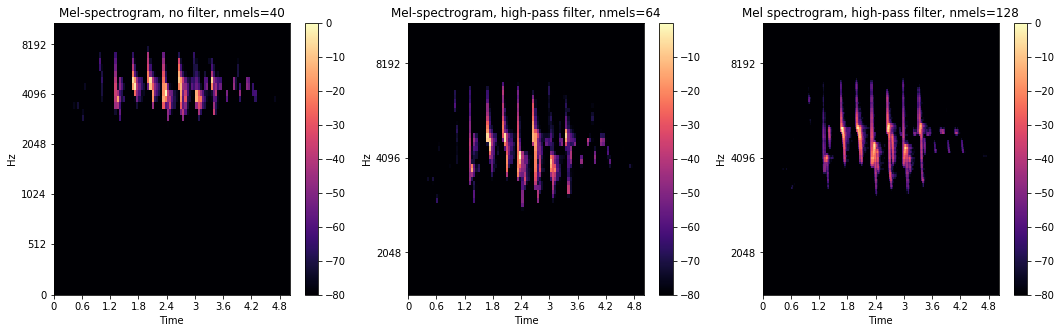

*******************************************


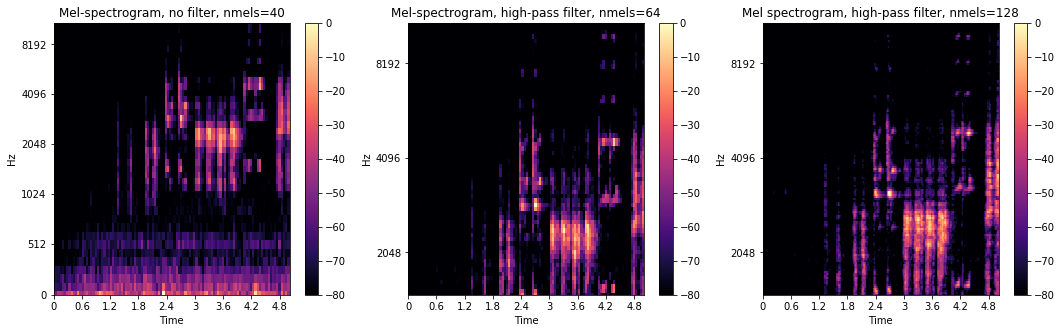

*******************************************


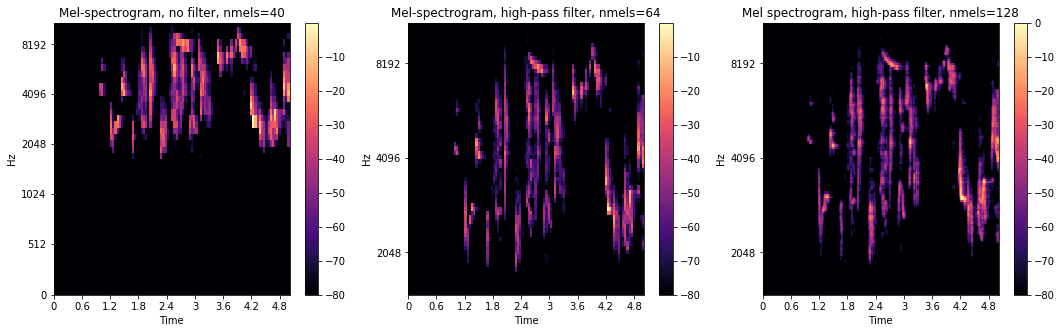

*******************************************


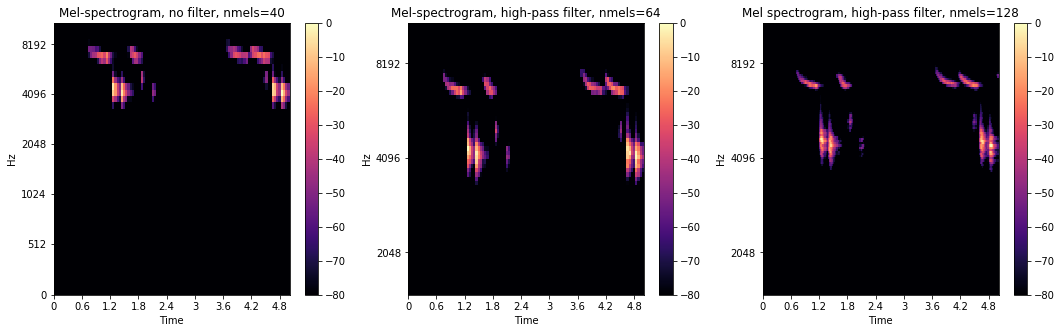

*******************************************


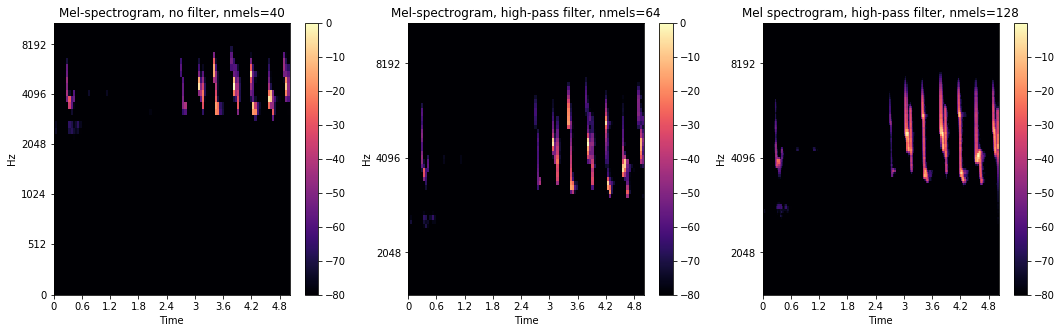

*******************************************


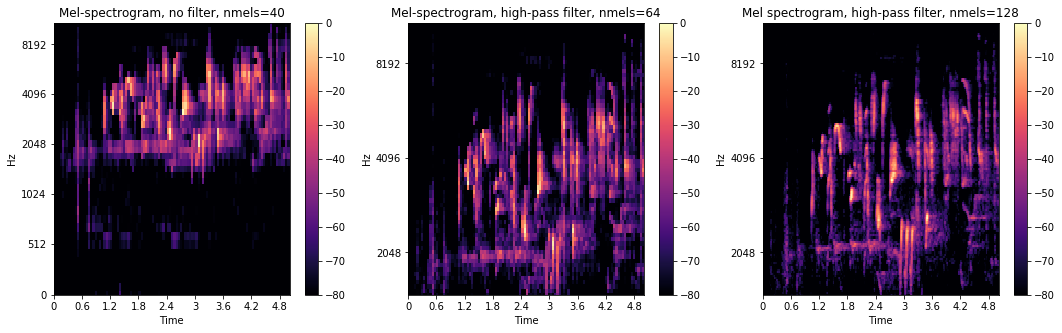

*******************************************


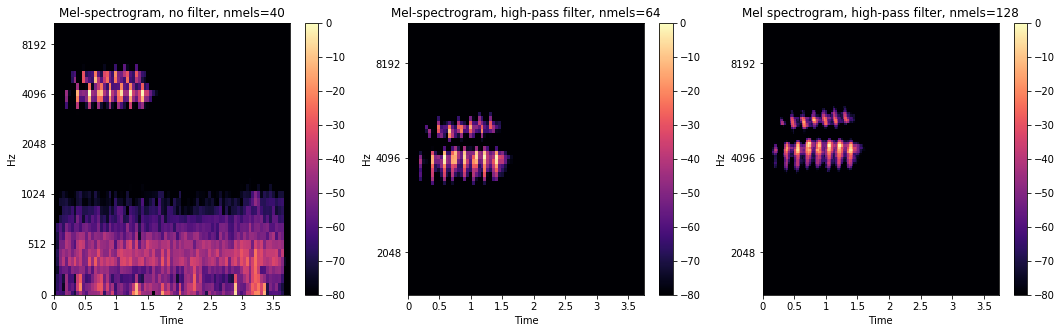

*******************************************


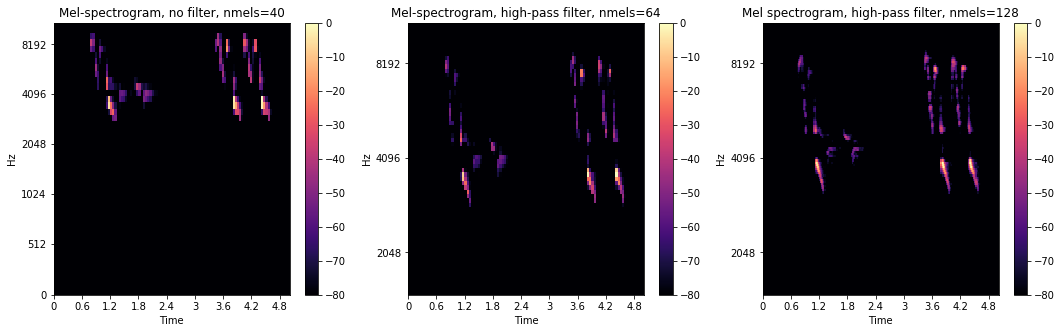

*******************************************


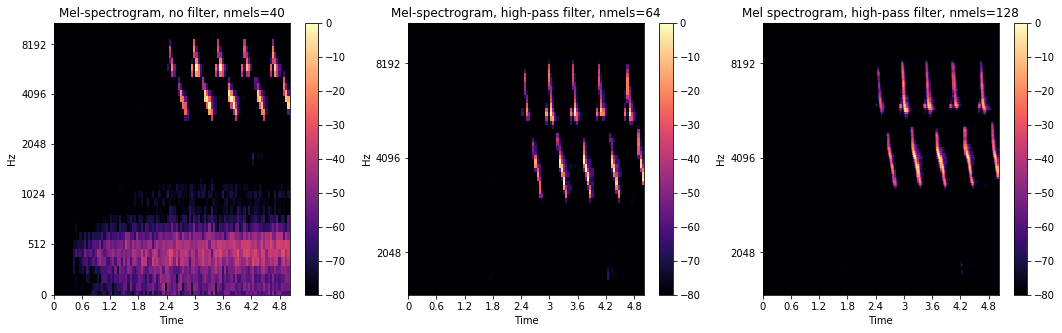

*******************************************


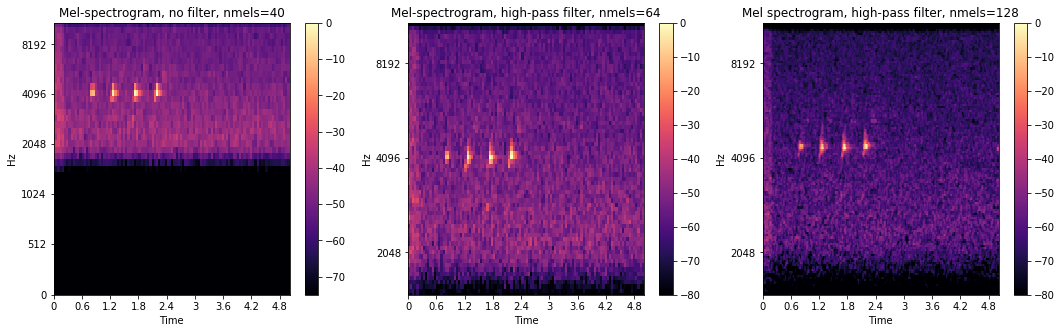

*******************************************


In [48]:
import matplotlib.pyplot as plt
from scipy import signal
import librosa.display
import numpy as np
from random import sample

# select random 5 recordings from Poland
randFiles = sample(range(len(flist)), 10)
print('Selected random files number:',randFiles)

# print(filePath)
### + ADG
### correction of sr value
### change of fmax value (not more than sr/2)
### change of ref (=max) --> normalization
### correction of frequency axis
### adding colorbar to plots
### changing plot titles
### correction of power2db input (S**2 instead of S)


for audioFile in randFiles:
    data, sr = librosa.load(flist[audioFile], duration=5) # sr = sampling rate

    ## Source: MK_spectrogram
    N_FFT = 1024         # Number of frequency bins for Fast Fourier Transform
    HOP_SIZE = 1024      # Number of audio frames between STFT columns
    N_MELS = 40          # Mel band parameters   
    WIN_SIZE = 1024      # number of samples in each STFT window
    WINDOW_TYPE = 'hann' # the windowin function
    FEATURE = 'mel'      # feature representation

    f, axs = plt.subplots(1,3,figsize=(18,5))
    plt.subplot(1,3,1)
    librosa.display.specshow(
        librosa.core.amplitude_to_db(
            librosa.feature.melspectrogram(
                            y=data, 
                            #S=np.abs(
                             #   librosa.stft(
                              #      data, n_fft = N_FFT, 
                               #     hop_length = HOP_SIZE, 
                                #    window = WINDOW_TYPE, 
                                 #   win_length = WIN_SIZE)
                                  #  )**2, 
                            sr=sr, 
                            n_fft=N_FFT, 
                            hop_length=HOP_SIZE, 
                            n_mels=N_MELS, 
                            htk=True, 
                            fmin=0.0, 
                            fmax=sr/2.0), 
                ref=np.max),
            sr=sr,
            hop_length=HOP_SIZE, 
            x_axis='time', 
            y_axis='mel')
    
    plt.colorbar()
    plt.title('Mel-spectrogram, no filter, nmels='  +str(N_MELS))


    # MK_spectrogram modified
    N_FFT = 1024         # 
    HOP_SIZE = 1024      #  
    N_MELS = 64          # Higher   
    WIN_SIZE = 1024      # 
    WINDOW_TYPE = 'hann' # 
    FEATURE = 'mel'      # 
    FMIN = 1500
    
    plt.subplot(1,3,2)
    librosa.display.specshow(
                librosa.core.amplitude_to_db(
                    librosa.feature.melspectrogram(
                                    y=data, 
                                    #S=np.abs(
                                     #   librosa.stft(
                                      #      data, n_fft = N_FFT, 
                                       #     hop_length = HOP_SIZE, 
                                        #    window = WINDOW_TYPE, 
                                         #   win_length = WIN_SIZE)
                                          #  )**2, 
                                    sr=sr, 
                                    n_fft=N_FFT, 
                                    hop_length=HOP_SIZE, 
                                    n_mels=N_MELS, 
                                    htk=True, 
                                    fmin=FMIN, # higher limit ##high-pass filter freq.
                                    fmax=sr/2), # higher limit ##sr/2 = max
                        ref=np.max),
                    sr=sr,
                    hop_length=HOP_SIZE, 
                    x_axis='time', 
                    y_axis='mel',
                    fmin=FMIN) #fmin -correct plot scale frequency parameter
    plt.title('Mel-spectrogram, high-pass filter, nmels=' +str(N_MELS))
    plt.colorbar()
    
    plt.subplot(1,3,3)
    # Source: AM_analyzeDataset
    n_mels=128
    S = librosa.feature.melspectrogram(y=data, sr=sr, fmin=FMIN) #AMPLITUDE
    librosa.display.specshow(librosa.power_to_db(S**2,ref=np.max),
                              y_axis='mel', x_axis='time', fmin=FMIN) #power = S**2
    plt.title('Mel spectrogram, high-pass filter, nmels=' +str(n_mels))
    plt.colorbar()
    plt.show()
    print('*******************************************')